In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
star_df = pd.read_csv("https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-")
star_df

In [ ]:
# First three
star_df.head(3)

In [ ]:
# 10 Random
star_df.sample(10)

In [ ]:
# General Information
star_df.info()

In [6]:
# Directory Creation
folder_name = 'star_plots'
os.makedirs(folder_name, exist_ok = True)
base_dir = f'/content/{folder_name}/'

In [ ]:
# Visualization
star_df['Star type'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
# Customization
plt.figure(figsize=(5,5))
plt.style.use("dark_background")
ax = star_df['Star type'].value_counts().plot(kind='bar', color = ['brown', 'red', 'white', 'yellow', 'lightblue', 'orange'])
ax.bar_label(ax.containers[0], color = 'green')
plt.title("Visualize star count per star type", color='royalblue', weight='bold')
plt.ylabel("Number of Stars", color='pink', weight='bold', fontsize=12)
plt.xlabel("Type of Star", color='purple', weight='bold', fontsize=12)
plt.yticks(color='tab:pink')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Brown\nDwarf', 'Red\nDwarf', 'White\nDwarf', 'Main\nSequence', 'Supergiants', 'Hypergiants'], color='cyan', rotation=30)
plt.savefig(base_dir+'bar_plt_star_count.png')
plt.show()

In [ ]:
# Bargraph using Seaborn
ax = sns.barplot(x = star_df['Star color'].value_counts().index, y = star_df['Star color'].value_counts())
ax.bar_label(ax.containers[0], color = 'red', weight = 'bold', fontsize=10)
plt.title("Visualizing the count of star colors")
plt.xticks(rotation=15, color='tab:pink')
plt.xlabel("Color of the star")
plt.ylabel("Count of stars")
plt.savefig(base_dir+'star_colors_viz.png')
plt.show()

In [ ]:
star_df.head(5)

In [ ]:
# Creating box plots
plt.style.use('default')
plt.figure(figsize=(23,8))
plt.suptitle("Visualizing the outliers in Numeric features of Star Type", weight='bold', fontsize=15)
for i in range(4):
  plt.subplot(1, 4, i+1)
  plt.title(f'{star_df.columns[i]}', color='red')
  plt.ylabel(" ")
  sns.boxplot(x=star_df['Star type'], y=star_df.iloc[:, i])
plt.savefig(base_dir+'box_plt_outliers.png')
plt.show()

In [12]:
# Line Plot func
def line_subplots(i, star_df, colors):
  plt.subplot(4, 1, i+1)
  plt.title(star_df.columns[i], color='red')
  plt.plot(star_df.iloc[:, i], color=colors[i])

In [ ]:
# Line Plots
# plt.figure(figsize=(10, 10))
plt.suptitle("Visualizing distribution of Numeric Features", color="black", fontsize=12, weight='bold')
colors = ['pink', 'gold', 'magenta', 'lime']
for i in range(4):
  line_subplots(i, star_df, colors)
plt.tight_layout()
plt.savefig(base_dir+'line_plt_num_feat.png')
plt.show()

<h1><b><i>Pair Plots</i></b></h1>

It compares one aspect of the data with all the other aspects and then plots it as a scatter plot.

In [ ]:
# Pair plot
plt.style.use('dark_background')
sns.pairplot(star_df, hue='Spectral Class')
# plt.tight_layout()
plt.savefig(base_dir+'star_pairplot.png')
plt.show()

In [27]:
# HR Diagram
star_type = star_df['Star type'].values
temperature = star_df['Temperature (K)'].values
abs_mag = star_df['Absolute magnitude(Mv)'].values

star_types = {
    0 : {'label': 'Brown Dwarf', 'color': 'brown', 'size': 30, 'marker': '.'},
    1 : {'label': 'Red Dwarf', 'color': 'red', 'size': 35, 'marker': '.'},
    2 : {'label': 'White Dwarf', 'color': 'white', 'size': 40, 'marker': '.'},
    3 : {'label': 'Main Squence', 'color': 'cyan', 'size': 30, 'marker': 'o'},
    4 : {'label': 'Supergiants', 'color': 'orange', 'size': 100, 'marker': 'o'},
    5 : {'label': 'Hypergiants', 'color': 'maroon', 'size': 150, 'marker': 'o'}
}


In [30]:
star_types[star_type[100]]['color']

'orange'

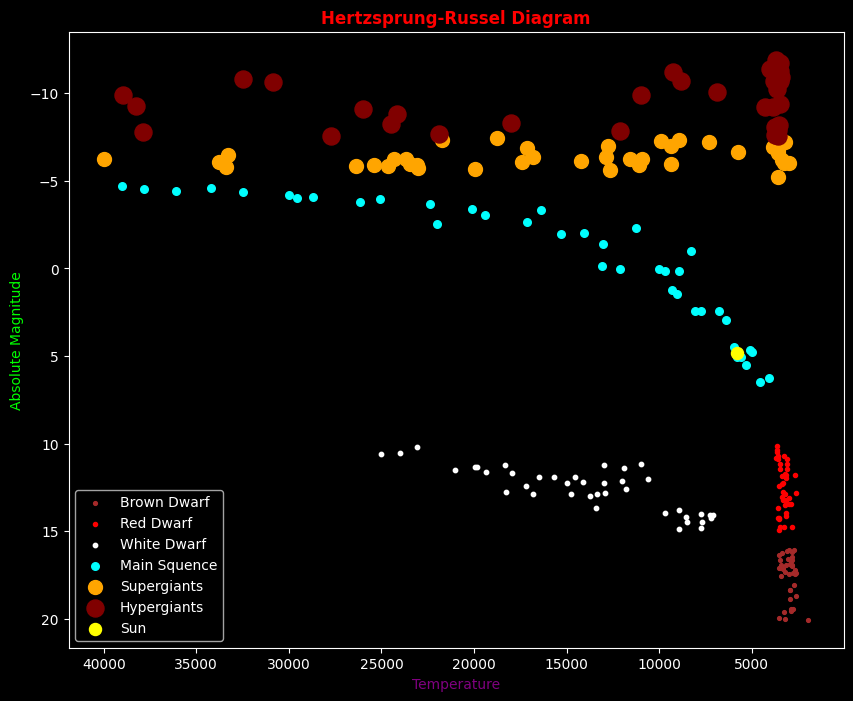

In [38]:
axes=[]
label = set()
plt.figure(figsize=(10,8))

for i in range(len(star_type)):
  properties = star_types[star_type[i]]
  if properties['label'] not in label:
    ax = plt.scatter(temperature[i], abs_mag[i], s=properties['size'], c=properties['color'], marker=properties['marker'], label=properties['label'])
    axes.append(ax)
    label.add(properties['label'])
  else:
    plt.scatter(temperature[i], abs_mag[i], s=properties['size'], c=properties['color'], marker=properties['marker'], label=properties['label'])

# Data of the Sun
ax_sun = plt.scatter(5778, 4.83, s=75, c='yellow', marker='o', label='Sun')
axes.append(ax_sun)
label.add('Sun')

plt.legend(handles=axes)

plt.gca().invert_xaxis() #gca->get current axis
plt.gca().invert_yaxis()

plt.xlabel('Temperature', color='purple')
plt.ylabel('Absolute Magnitude', color='lime')
plt.title("Hertzsprung-Russel Diagram", color='red', weight='bold')

plt.savefig(base_dir+"HR_diagram.png")

plt.show()